# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
LEARNING_RATE = [0.01, 0.001]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
METHOD = ["SGD", "RMSprop", "AdaGrad", "Adam"]

In [18]:
results = {}
"""
撰寫訓練流程並將結果用 dictionary 紀錄
"""
for i in range(len(METHOD)):
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with %s and LR = %.6f" % (METHOD[i], lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if i==0:
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif i==1:
            optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0) 
        elif i==2:
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        else:
            optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
            
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-%s-lr-%s" % (str(METHOD[i]), str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with SGD and LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===

50000/50000 [==============================] - 2s 49us/step - loss: 1.4241 - accuracy: 0.5026 - val_loss: 1.4556 - val_accuracy: 0.4837
Epoch 12/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.4006 - accuracy: 0.5085 - val_loss: 1.4457 - val_accuracy: 0.4902
Epoch 13/30
50000/50000 [==============================] - 3s 52us/step - loss: 1.3816 - accuracy: 0.5177 - val_loss: 1.4863 - val_accuracy: 0.4763
Epoch 14/30
50000/50000 [==============================] - 3s 52us/step - loss: 1.3616 - accuracy: 0.5229 - val_loss: 1.4336 - val_accuracy: 0.4910
Epoch 15/30
50000/50000 [==============================] - 3s 52us/step - loss: 1.3431 - accuracy: 0.5291 - val_loss: 1.4191 - val_accuracy: 0.4934
Epoch 16/30
50000/50000 [==============================] - 3s 51us/step - loss: 1.3250 - accuracy: 0.5344 - val_loss: 1.3950 - val_accuracy: 0.5060
Epoch 17/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.3070 - accuracy: 0.5412 - val_loss: 1.3810

50000/50000 [==============================] - 3s 52us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Experiment with RMSprop and LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________

Epoch 12/30
50000/50000 [==============================] - 2s 48us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 13/30
50000/50000 [==============================] - 2s 47us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 14/30
50000/50000 [==============================] - 2s 42us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 15/30
50000/50000 [==============================] - 2s 43us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 16/30
50000/50000 [==============================] - 2s 47us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 17/30
50000/50000 [==============================] - 2s 49us/step - loss: 2.3547 - accuracy: 0.0951 - val_loss: 2.3553 - val_accuracy: 0.1009
Epoch 18/30
50000/50000 [==============================] - 2s 48us/step - loss: 2.3547 - accuracy: 0.0951 - val_

Epoch 30/30
50000/50000 [==============================] - 2s 48us/step - loss: 2.3699 - accuracy: 0.1057 - val_loss: 2.3716 - val_accuracy: 0.1018
Experiment with Adam and LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

50000/50000 [==============================] - 3s 56us/step - loss: 1.4237 - accuracy: 0.4950 - val_loss: 1.4759 - val_accuracy: 0.4716
Epoch 11/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.4019 - accuracy: 0.5046 - val_loss: 1.4528 - val_accuracy: 0.4796
Epoch 12/30
50000/50000 [==============================] - 2s 49us/step - loss: 1.3845 - accuracy: 0.5089 - val_loss: 1.4458 - val_accuracy: 0.4882
Epoch 13/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.3642 - accuracy: 0.5162 - val_loss: 1.4340 - val_accuracy: 0.4905
Epoch 14/30
50000/50000 [==============================] - 2s 50us/step - loss: 1.3506 - accuracy: 0.5204 - val_loss: 1.4063 - val_accuracy: 0.5004
Epoch 15/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.3324 - accuracy: 0.5281 - val_loss: 1.3995 - val_accuracy: 0.4993
Epoch 16/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.3165 - accuracy: 0.5342 - val_loss: 1.3761

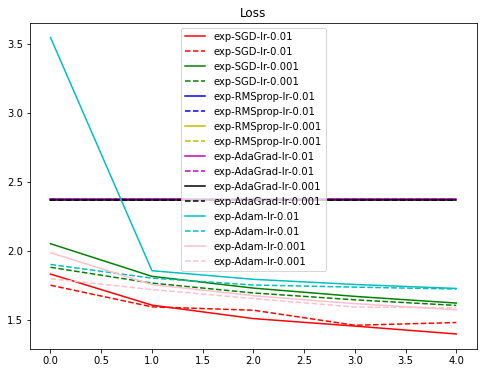

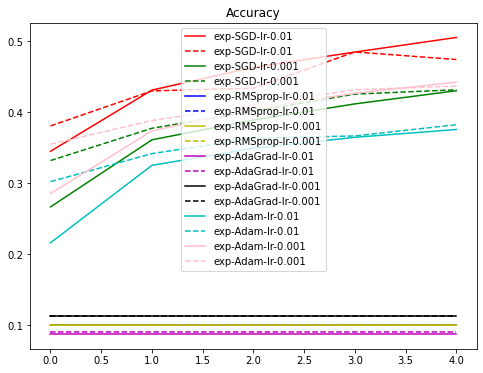

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()